# Lambeq Practice Notebook
Lambeq is a Python library for with quantum natural language processing.

First, make sure you have Lambeq installed using:
```
conda activate [VENV]
pip install lambeq
```

## Sentence Diagrams
Lambeq uses a tokeniser to split sentences by punctuation and whitespace. Try replacing the sentence below:

In [58]:
from lambeq import SpacyTokeniser

tokeniser = SpacyTokeniser()
sentence = "John walks in the park."
tokens = tokeniser.tokenise_sentence(sentence)
tokens

['John', 'walks', 'in', 'the', 'park', '.']

BobcatParaser is one way to model your sentence as a string diagram. The parser takes in the list of tokens, and classifies the tokens by their DisCoCat type.

In [59]:
from lambeq import BobcatParser, pregroups

parser = BobcatParser(verbose='suppress')
diagram = parser.sentence2diagram(tokens, tokenised=True)

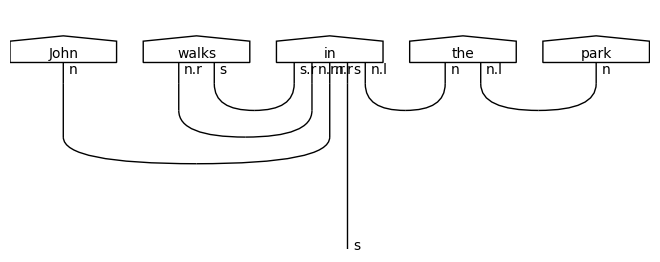

In [60]:
from discopy import pregroup as pg
pg.draw(diagram)

There are other string diagrams that you can work with, such as spiders.

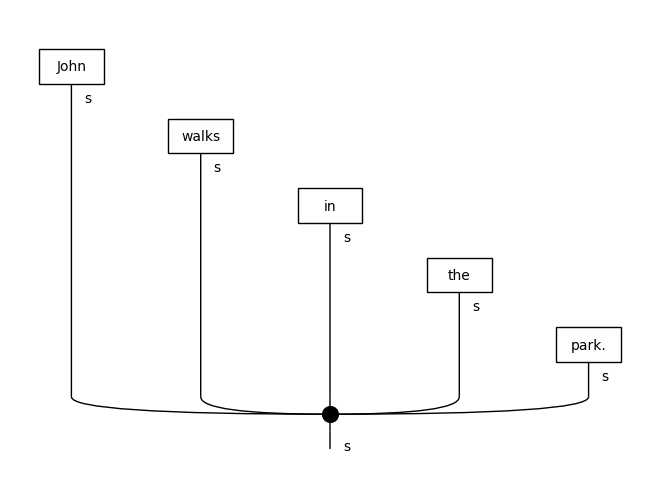

In [61]:
from lambeq import spiders_reader
spiders_diagram = spiders_reader.sentence2diagram(sentence)
spiders_diagram.draw()

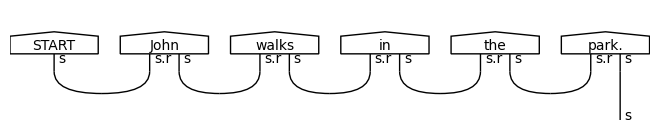

In [62]:
from lambeq import cups_reader

cups_diagram = cups_reader.sentence2diagram(sentence)
pg.draw(cups_diagram)

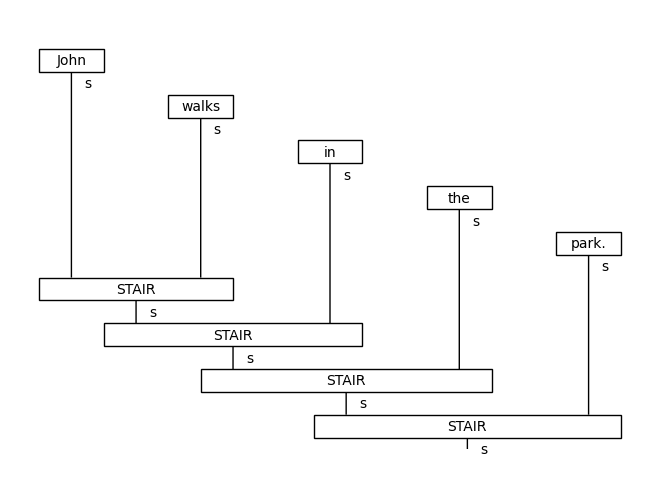

In [63]:
from lambeq import stairs_reader

stairs_diagram = stairs_reader.sentence2diagram(sentence)
stairs_diagram.draw()

## Parameterizing String Diagrams

String diagrams are converted to quantum circuits or tensor networks using some ansatz, which maps characteristics of a string diagram to features of a quantum circuit.

First, let's look at `IQPAnsatz`.

In [64]:
from lambeq import AtomicType, IQPAnsatz

In [65]:
parser = BobcatParser(verbose='text')
diagram = parser.sentence2diagram(sentence)

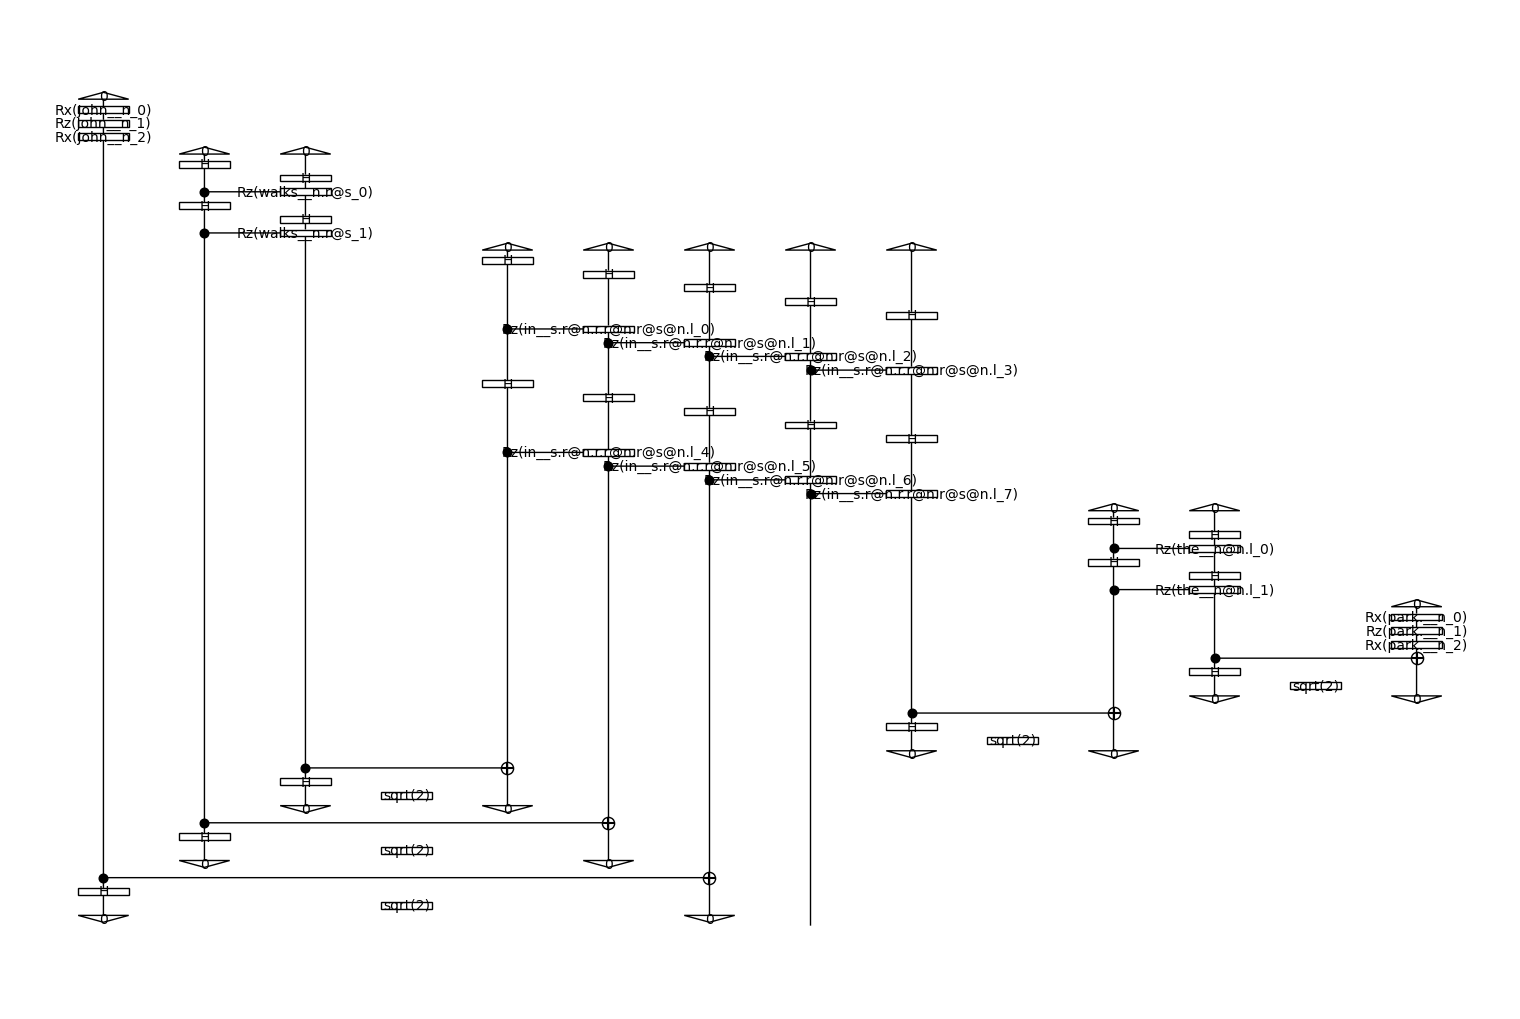

In [66]:
# Define atomic types
N = AtomicType.NOUN
S = AtomicType.SENTENCE

# Convert string diagram to quantum circuit
ansatz = IQPAnsatz({N: 1, S: 1}, n_layers=2)
discopy_circuit = ansatz(diagram)
discopy_circuit.draw(figsize=(15,10))

In [67]:
from pytket.circuit.display import render_circuit_jupyter

tket_circuit = discopy_circuit.to_tk()

render_circuit_jupyter(tket_circuit)

In [68]:
from pytket.extensions.qiskit import tk_to_qiskit

qiskit_circuit = tk_to_qiskit(tket_circuit)

In [69]:
import qiskit

In [72]:
qiskit_circuit.draw()

┌───────────────────┐         ┌───────────────────┐        »
 q_0: ┤ Rx(2*π*John__n_0) ├─────────┤ Rz(2*π*John__n_1) ├────────»
      └───────┬───┬───────┘         └───────────────────┘        »
 q_1: ────────┤ H ├───────────────────────────■──────────────────»
              ├───┤               ┌───────────┴────────────┐     »
 q_2: ────────┤ H ├───────────────┤ Rz(2*π*walks__n.r@s_0) ├─────»
              ├───┤               └────────────────────────┘     »
 q_3: ────────┤ H ├───────────────────────────■──────────────────»
              ├───┤         ┌─────────────────┴─────────────────┐»
 q_4: ────────┤ H ├─────────┤ Rz(2*π*in__s.r@n.r.r@n.r@s@n.l_0) ├»
              ├───┤         └───────────────────────────────────┘»
 q_5: ────────┤ H ├──────────────────────────────────────────────»
              ├───┤                                              »
 q_6: ────────┤ H ├──────────────────────────────────────────────»
              ├───┤                                              »
 q_7: ────────┤ H ├──────────────────────────────────────────────»
              ├───┤                                              »
 q_8: ────────┤ H ├───────────────────────────■──────────────────»
              ├───┤                ┌──────────┴───────────┐      »
 q_9: ────────┤ H ├────────────────┤ Rz(2*π*the__n@n.l_0) ├──────»
      ┌───────┴───┴────────┐       └┬────────────────────┬┘      »
q_10: ┤ Rx(2*π*park.__n_0) ├────────┤ Rz(2*π*park.__n_1) ├───────»
      └────────────────────┘        └────────────────────┘       »
c: 10/═══════════════════════════════════════════════════════════»
                                                                 »
«              ┌───────────────────┐        »
« q_0: ────────┤ Rx(2*π*John__n_2) ├────────»
«              └───────┬───┬───────┘        »
« q_1: ────────────────┤ H ├────────────────»
«                      ├───┤                »
« q_2: ────────────────┤ H ├────────────────»
«                      ├───┤                »
« q_3: ────────────────┤ H ├────────────────»
«                      └───┘                »
« q_4: ──────────────────■──────────────────»
«      ┌─────────────────┴─────────────────┐»
« q_5: ┤ Rz(2*π*in__s.r@n.r.r@n.r@s@n.l_1) ├»
«      └───────────────────────────────────┘»
« q_6: ─────────────────────────────────────»
«                                           »
« q_7: ─────────────────────────────────────»
«                      ┌───┐                »
« q_8: ────────────────┤ H ├────────────────»
«                      ├───┤                »
« q_9: ────────────────┤ H ├────────────────»
«              ┌───────┴───┴────────┐       »
«q_10: ────────┤ Rx(2*π*park.__n_2) ├───────»
«              └────────────────────┘       »
«c: 10/═════════════════════════════════════»
«                                           »
«                                           »
« q_0: ─────────────────────────────────────»
«                                           »
« q_1: ──────────────────■──────────────────»
«            ┌───────────┴────────────┐     »
« q_2: ──────┤ Rz(2*π*walks__n.r@s_1) ├─────»
«            └────────────────────────┘     »
« q_3: ─────────────────────────────────────»
«                      ┌───┐                »
« q_4: ────────────────┤ H ├────────────────»
«                      └───┘                »
« q_5: ──────────────────■──────────────────»
«      ┌─────────────────┴─────────────────┐»
« q_6: ┤ Rz(2*π*in__s.r@n.r.r@n.r@s@n.l_2) ├»
«      └───────────────────────────────────┘»
« q_7: ─────────────────────────────────────»
«                                           »
« q_8: ──────────────────■──────────────────»
«             ┌──────────┴───────────┐      »
« q_9: ───────┤ Rz(2*π*the__n@n.l_1) ├──────»
«             └──────────────────────┘      »
«q_10: ─────────────────────────────────────»
«                                           »
«c: 10/═════════════════════════════════════»
«                                           »
«                              